![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Cleaning categorical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in `files_for_lab` folder. In this lab we will explore categorical data. You can also continue working on the same jupyter notebook from the previous lab. However that is not necessary.

### Instructions

1. Import the necessary libraries if you are starting a new notebook.
2. Load the csv. Use the variable `customer_df` as `customer_df = pd.read_csv()`.
3. What should we do with the `customer_id` column?
4. Load the continuous and discrete variables into `numericals_df` and `categorical_df` variables, for eg.: 
    ```py
    numerical_df = customer_df.select_dtypes()
    categorical_df = customer_df.select_dtypes()
    ```
5. Plot every categorical variable. What can you see in the plots? Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. However, this time you will try a different plot. This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis
6. For the categorical data, check if there is any data cleaning that need to perform. 
**Hint**: You can use the function `value_counts()` on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.


## 1. Importing libraries

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

## 2. Loading Dataset

In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## 3. Dropping column customer and cleaning a little bit

In [4]:
cols = [col_name.lower().replace(' ', '_') for col_name in customer_df]
customer_df.columns = cols
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [5]:
#lets divide effective_to_date in two months, January and February since thay are the only two months appearing
#customer_df['effective_to_date'][customer_df['effective_to_date'].str.startswith("1")==True]="January"
#customer_df['effective_to_date'][customer_df['effective_to_date'].str.startswith("2")==True]="February"

In [6]:
customer_df['effective_to_date'] = ["January" if x.startswith("1")==True else "February" for x in customer_df['effective_to_date']]

In [7]:
customer_df.effective_to_date.value_counts()

January     4898
February    4236
Name: effective_to_date, dtype: int64

## 4. Splitting categoricals and numericals

In [8]:
# we should delete customer_id since we already have an index
numerical_df = customer_df.select_dtypes(include = np.number)
categorical_df = customer_df.select_dtypes(include = np.object)
categorical_df = categorical_df.drop(['customer'], axis=1)

## 5. Plotting categoricals

### 5.1 In this first case we willl take Total Claim Amount as the target

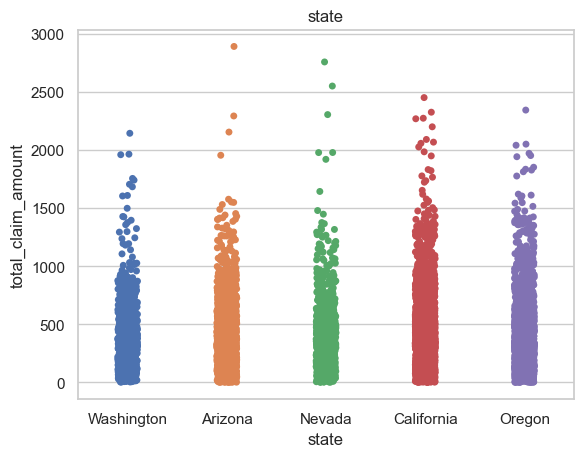

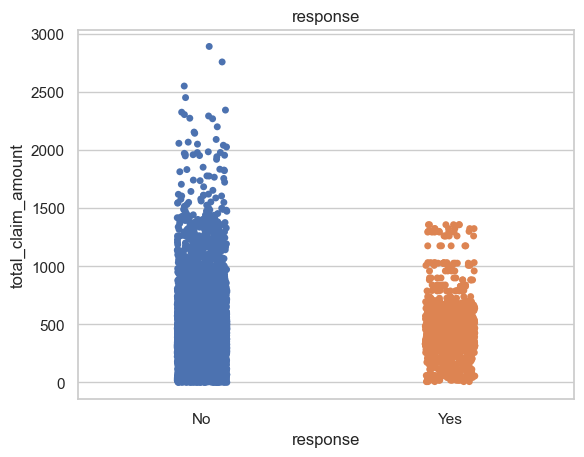

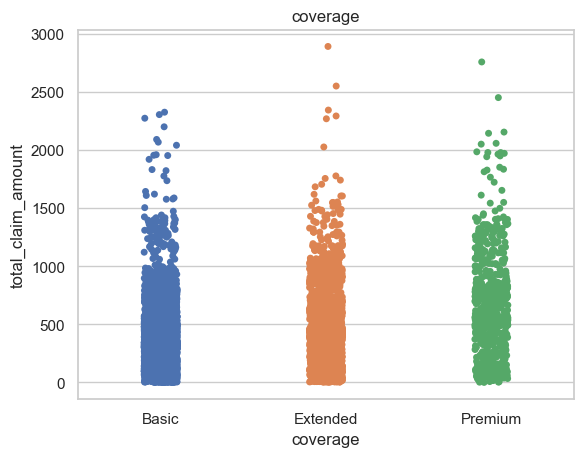

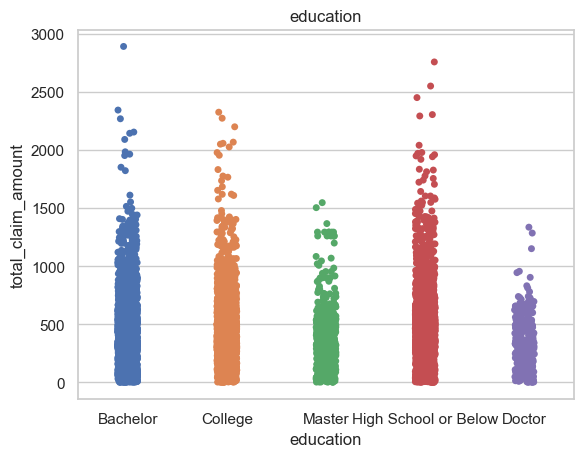

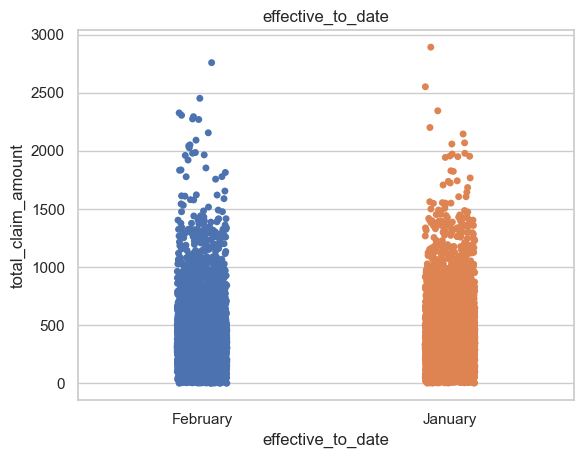

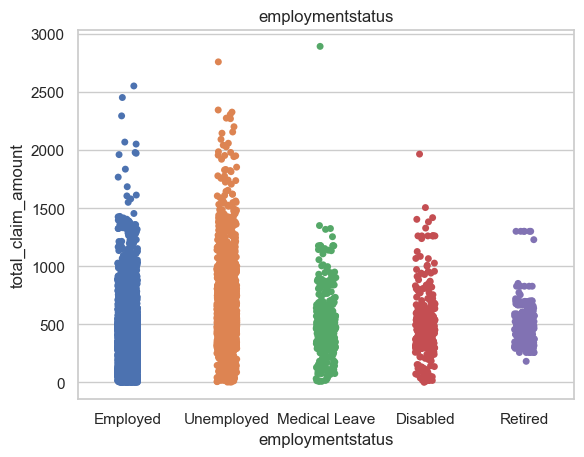

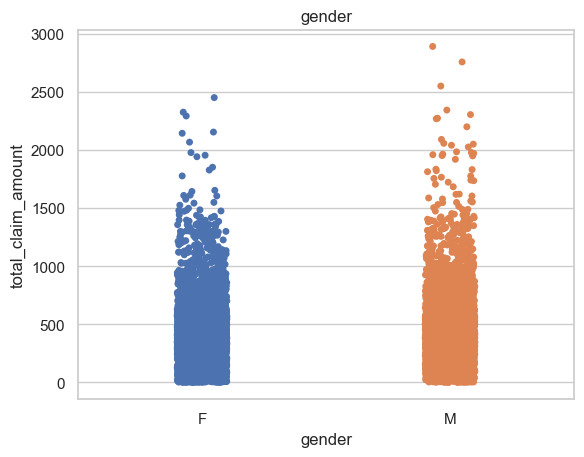

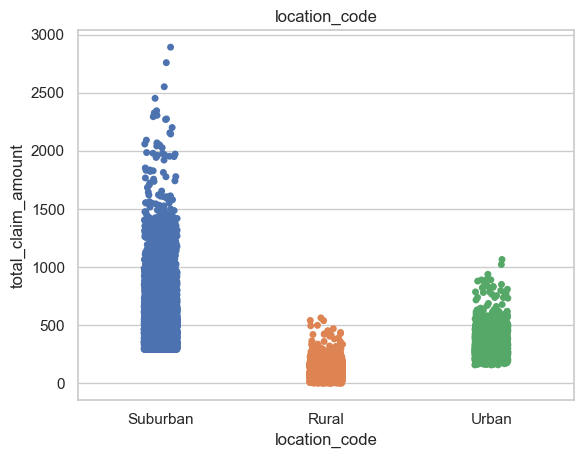

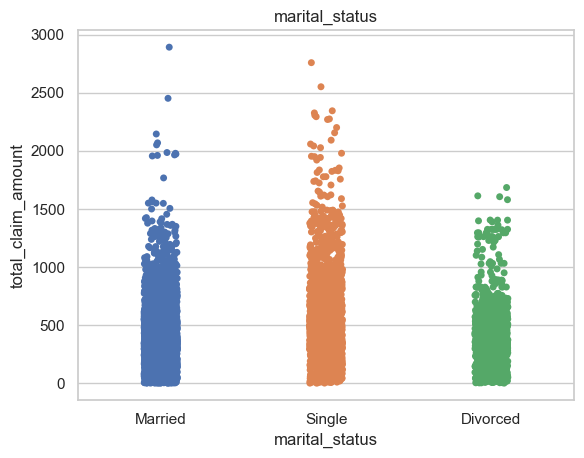

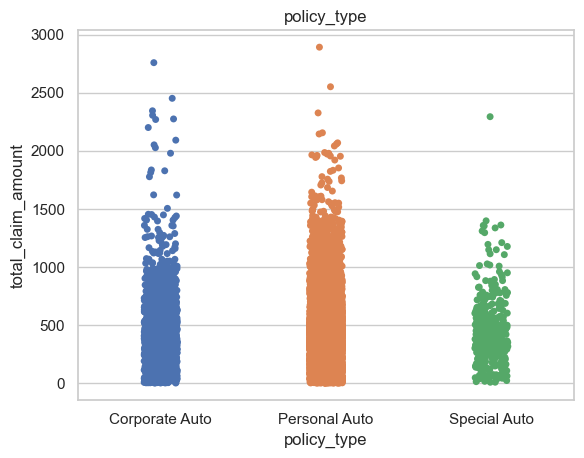

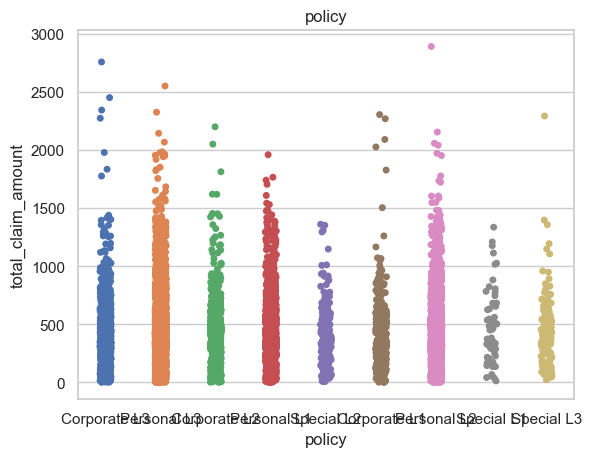

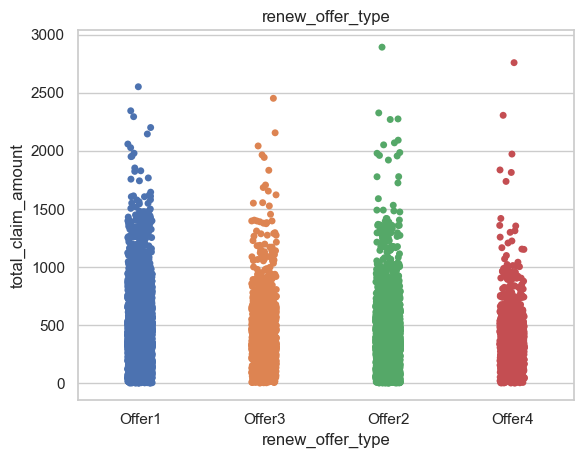

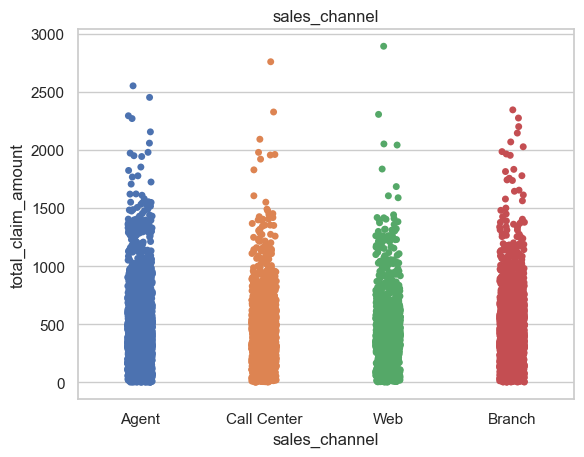

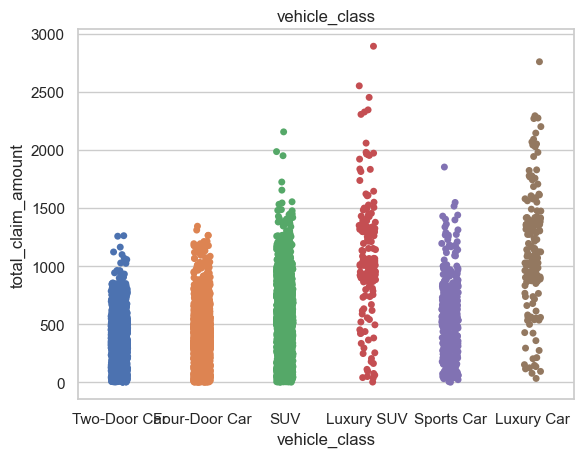

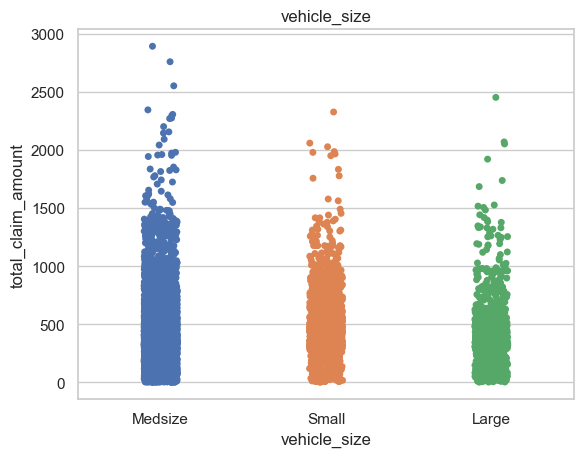

In [9]:
#first type of charts

sns.set(style="whitegrid")
  
# which plot should be made
for col in categorical_df:
    ax = sns.stripplot(x=customer_df[col], y="total_claim_amount", data=customer_df)
    plt.title(f'{col}')
    plt.show()

### 5.2 Now I will count them

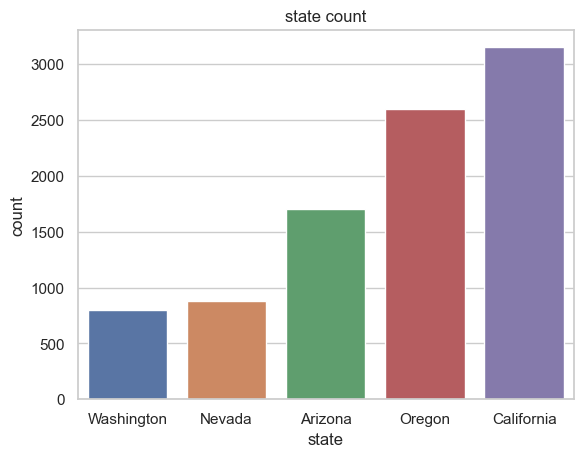

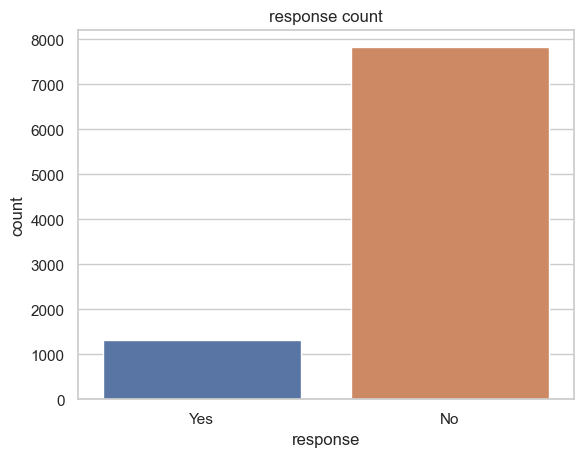

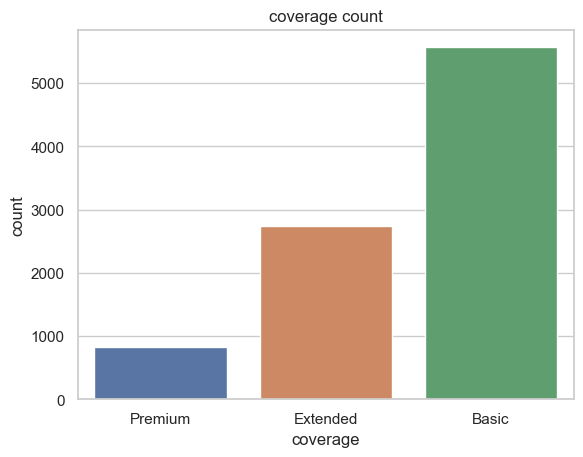

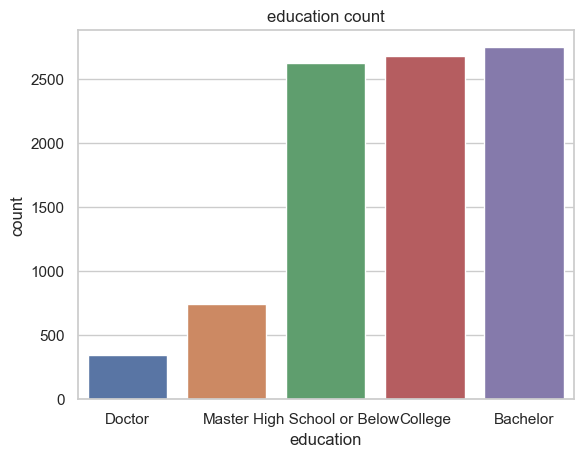

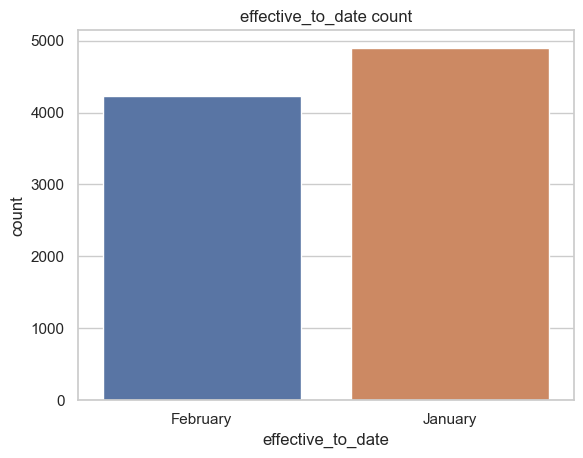

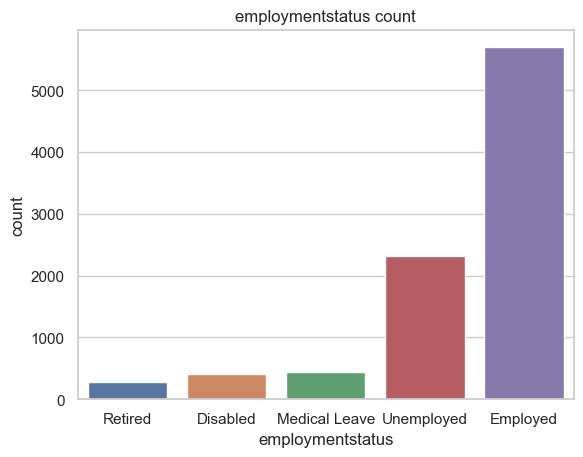

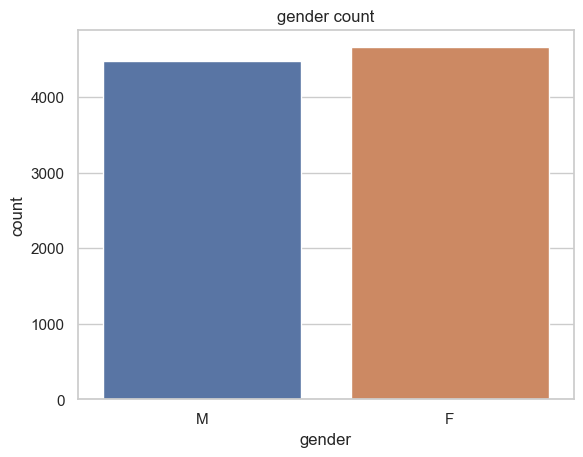

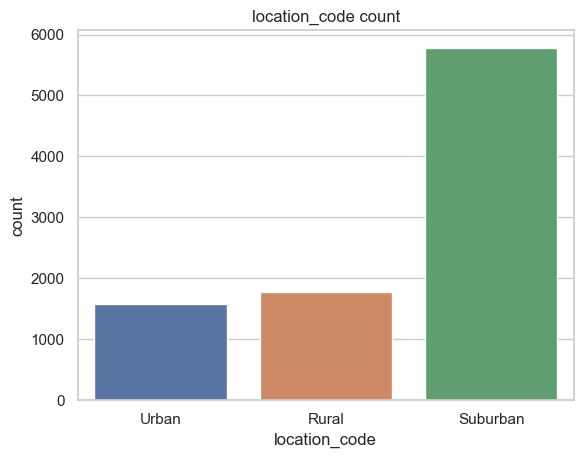

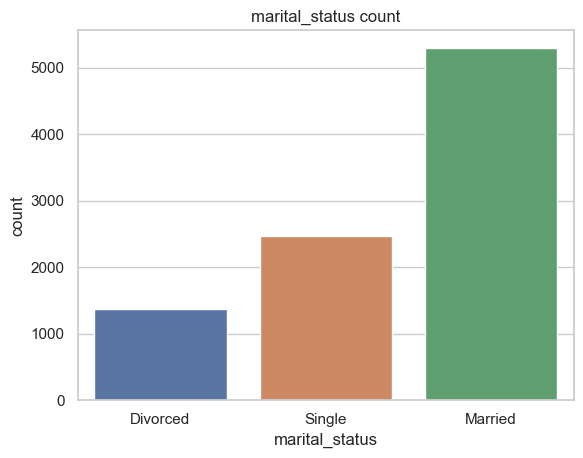

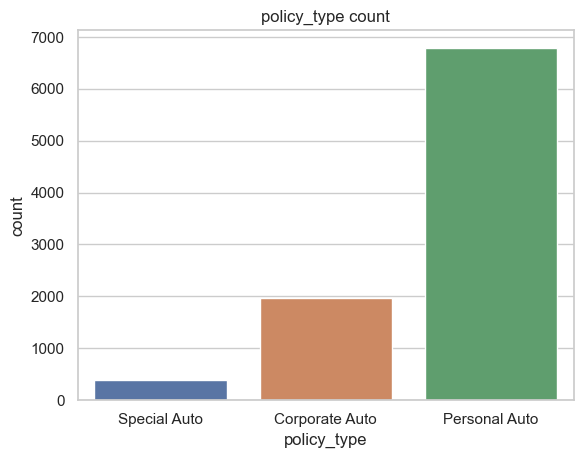

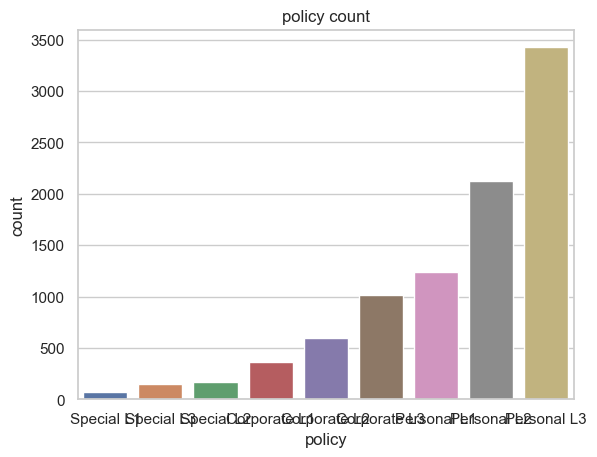

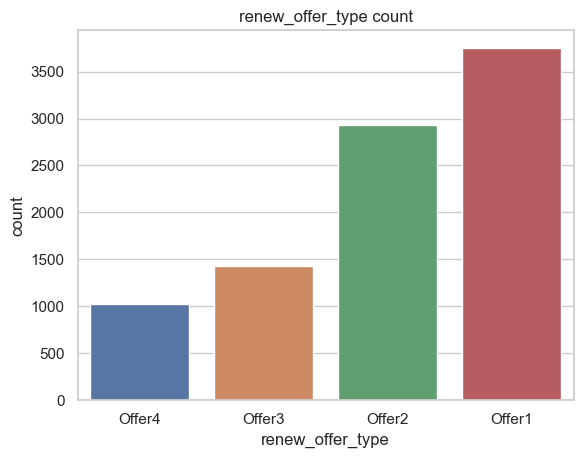

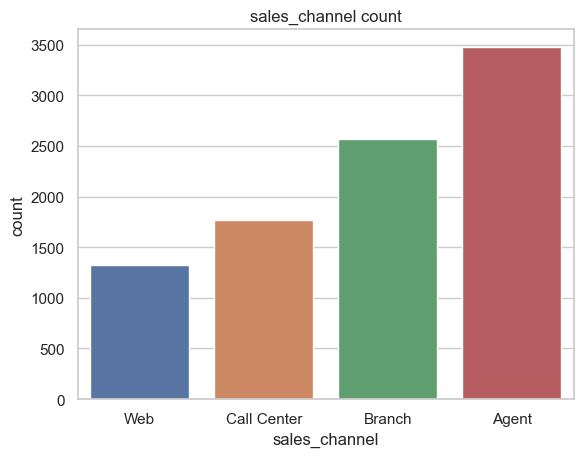

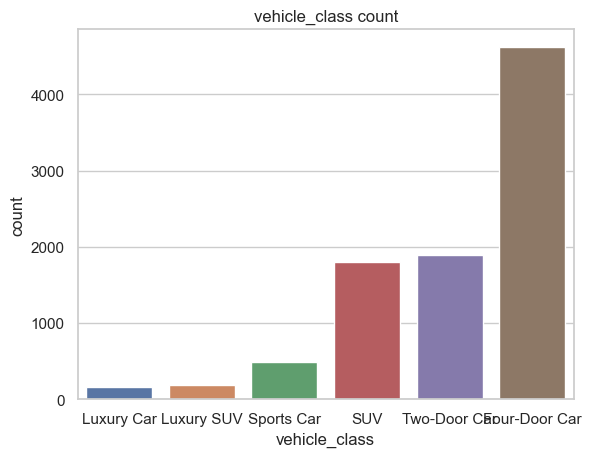

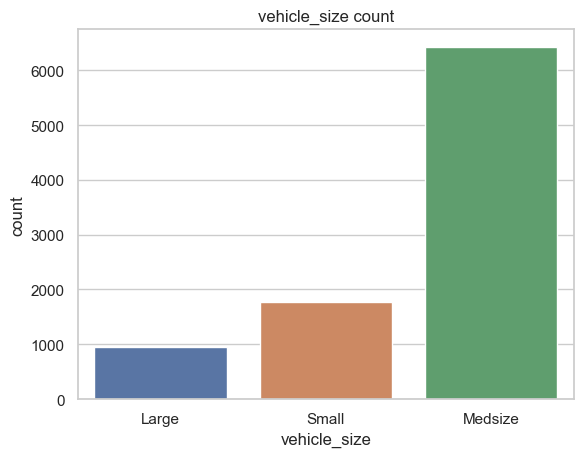

In [10]:
for col in categorical_df:
    ax = sns.countplot(customer_df[col], order=customer_df[col].value_counts(ascending=True).index )
    plt.title(f'{col} count')
    plt.show()


### 5.3 Lets try someting different (I stacked them by Response = Yes/No)

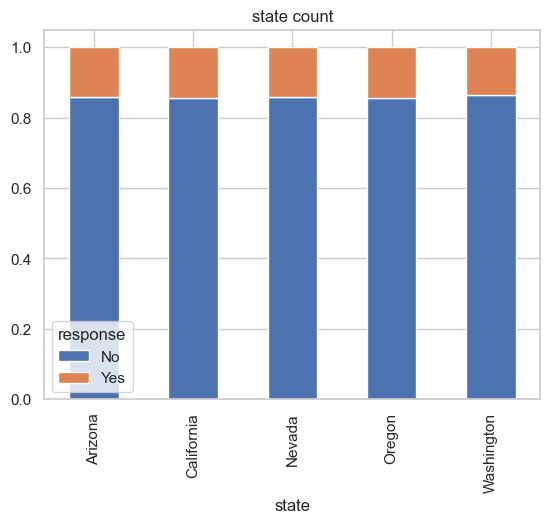

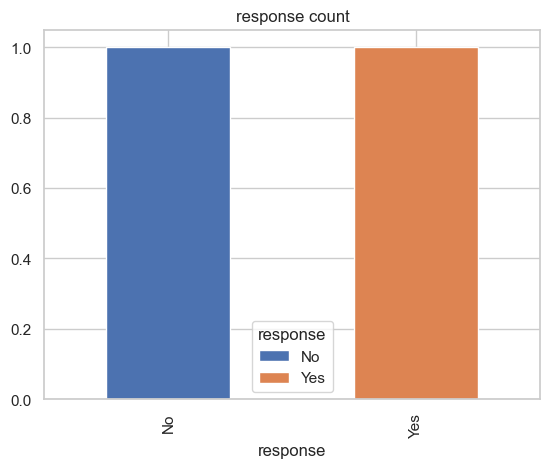

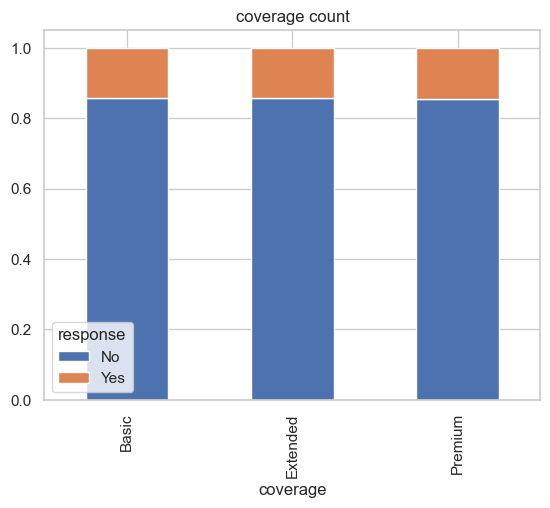

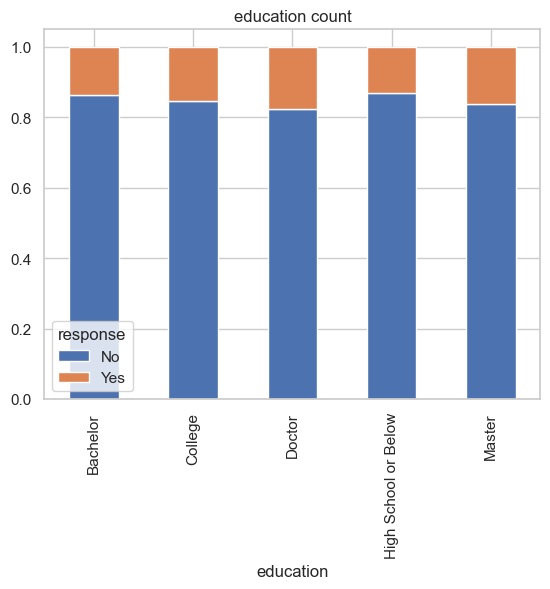

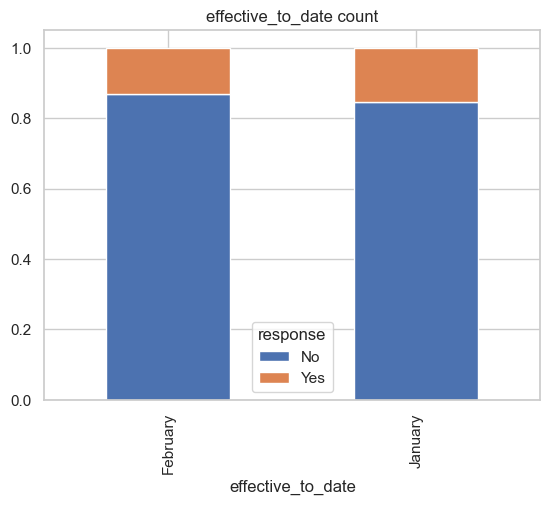

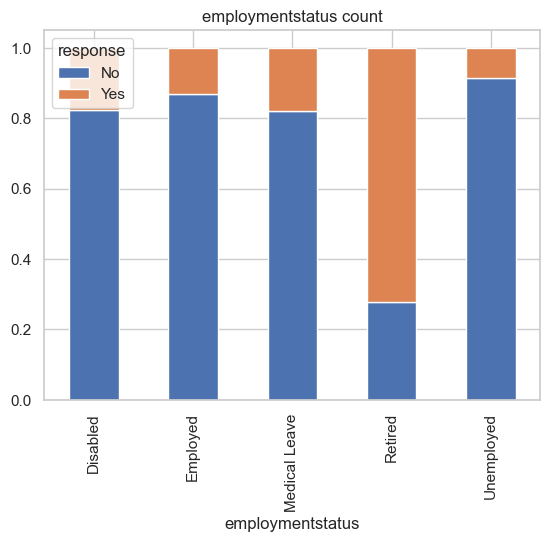

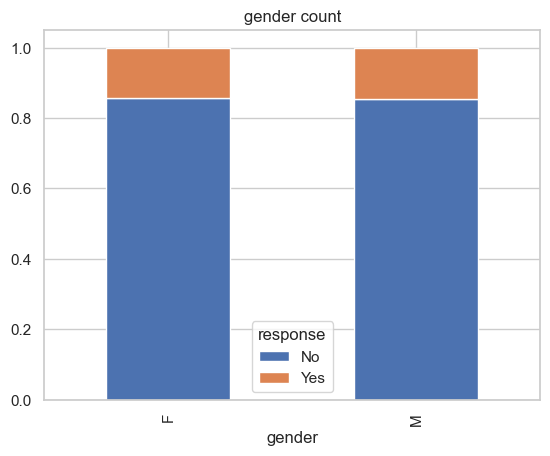

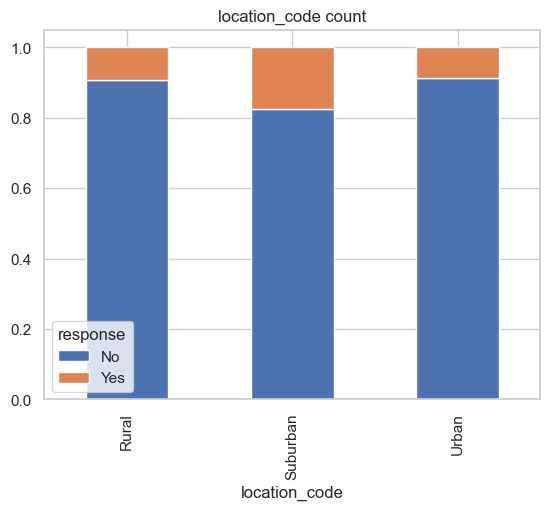

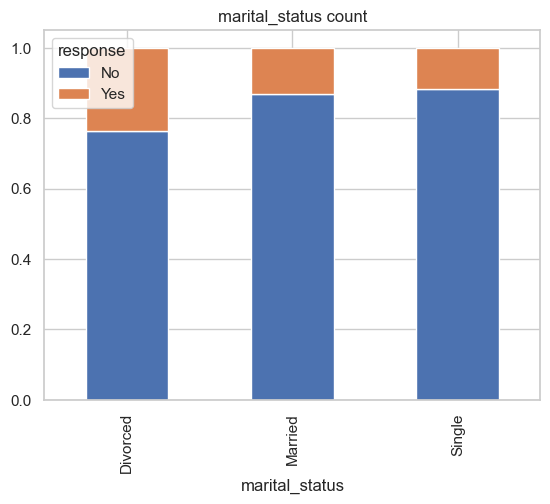

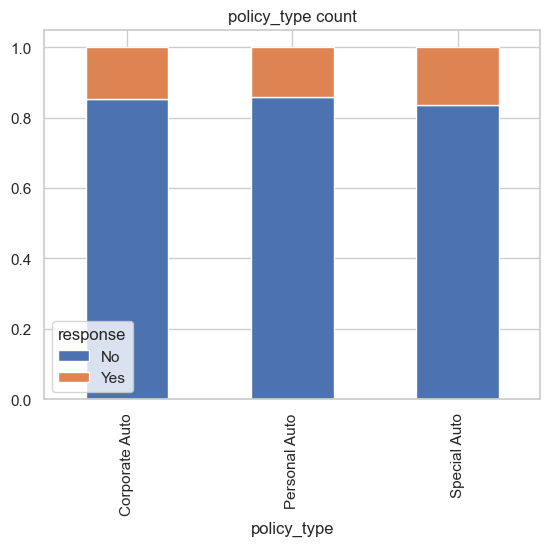

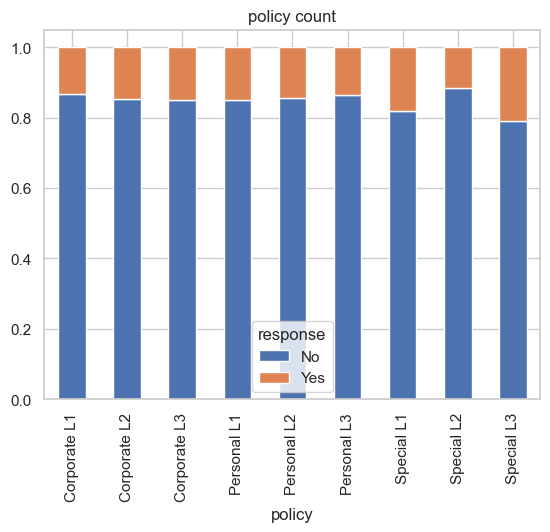

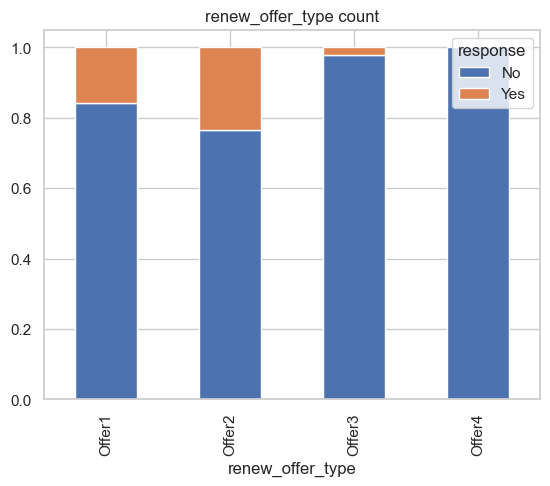

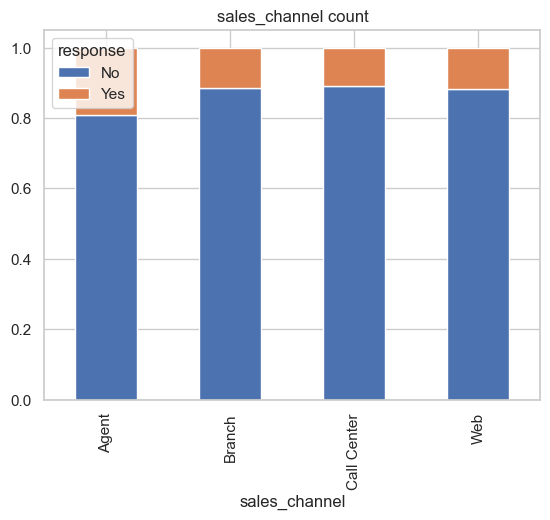

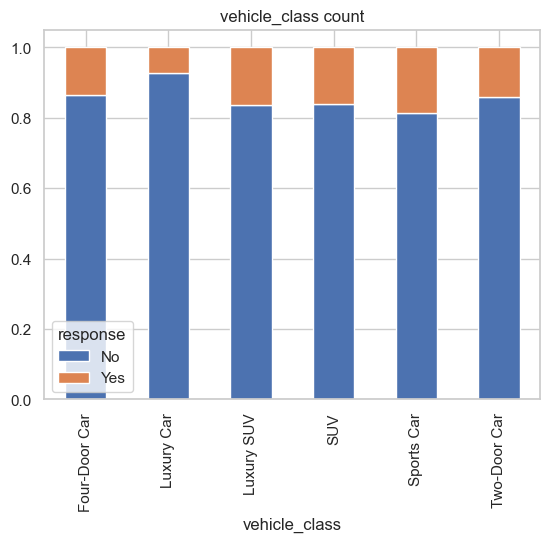

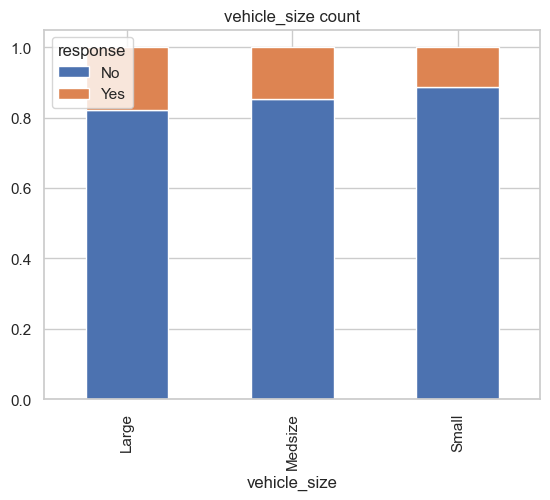

In [11]:
for col in categorical_df:
    table=pd.crosstab(customer_df[col],customer_df.response)
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
    plt.title(f'{col} count')
    plt.show()

## 6. Checking if we have to do some data cleaning

In [12]:
categorical_df.isna().sum()

state                0
response             0
coverage             0
education            0
effective_to_date    0
employmentstatus     0
gender               0
location_code        0
marital_status       0
policy_type          0
policy               0
renew_offer_type     0
sales_channel        0
vehicle_class        0
vehicle_size         0
dtype: int64

In [13]:
categorical_df.state.value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

In [14]:
categorical_df.response.value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

In [15]:
categorical_df.coverage.value_counts()

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

In [16]:
categorical_df.education.value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [17]:
categorical_df.effective_to_date.value_counts()

January     4898
February    4236
Name: effective_to_date, dtype: int64

In [18]:
categorical_df.employmentstatus.value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [19]:
categorical_df.gender.value_counts()

F    4658
M    4476
Name: gender, dtype: int64

In [20]:
categorical_df.location_code.value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

In [21]:
categorical_df.marital_status.value_counts()

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

In [22]:
categorical_df.policy_type.value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [23]:
categorical_df.policy.value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [24]:
categorical_df.renew_offer_type.value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

In [25]:
categorical_df.sales_channel.value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

In [26]:
categorical_df.vehicle_size.value_counts()

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [27]:
categorical_df.vehicle_class.value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

It doesn't seem we have to do anything, there are't weird categorical values.